<a href="https://colab.research.google.com/github/RanjitMane7/stackoverflow-que-tags/blob/main/stackoverflow_que_tags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
tags_list = ['tensorflow', 'keras', 'pandas', 'scikit-learn', 'seaborn', 'numpy', 'matplotlib']

In [8]:
#data_url = r'gdrive://home/bq-results-20210506-000204-wrn723q78ynd/bq-results-20210506-000204-wrn723q78ynd.csv'

In [9]:
#!gsutil cp 'gdrive://home/bq-results-20210506-000204-wrn723q78ynd/bq-results-20210506-000204-wrn723q78ynd.csv' ./

In [10]:
import pandas as pd
import numpy as np

In [11]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [12]:
df = pd.read_csv("/gdrive/MyDrive/bq-results-20210506-000204-wrn723q78ynd/bq-results-20210506-000204-wrn723q78ynd.csv")

In [13]:
df.head()

,text,tags
0,blabla: scatter and colorbar values i have dat...,"python,matplotlib"
1,code is working but with a 'deprecationwarning...,"python,csv,numpy,statistics,scipy"
2,design strategy for managing and processing da...,"dataset,pandas,pytables"
3,python pattern's restrictingwrapper with metac...,"python,design-patterns,numpy,pandas,metaclass"
4,blabla axes formatting i am creating a realtim...,"python,matplotlib,pyqt"


In [14]:
def req_tags(tags):
    tags_short=[]
    for i in tags_list:
        if i in tags:
            tags_short.append(i)
    return ','.join(tags_short)

In [15]:
df['tags'] = df['tags'].apply(req_tags)

In [16]:
#df['tags'][:5].apply(for t)

In [17]:
# aa = df['tags'][:1]
# aa.apply(req_tags)
# df.head()

,text,tags
0,blabla: scatter and colorbar values i have dat...,matplotlib
1,code is working but with a 'deprecationwarning...,numpy
2,design strategy for managing and processing da...,pandas
3,python pattern's restrictingwrapper with metac...,"pandas,numpy"
4,blabla axes formatting i am creating a realtim...,matplotlib


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411626 entries, 0 to 411625
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    411626 non-null  object
 1   tags    411626 non-null  object
dtypes: object(2)
memory usage: 6.3+ MB


In [19]:
# df['tags'].describe()

count     411626
unique        64
top       pandas
freq      167334
Name: tags, dtype: object

In [20]:
# df['tags'].values[:10]

array(['matplotlib', 'numpy', 'pandas', 'pandas,numpy', 'matplotlib',
       'numpy,matplotlib', 'numpy', 'numpy', 'matplotlib', 'numpy'],
      dtype=object)

In [21]:
df.shape

(411626, 2)

In [98]:
#imports
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils import shuffle
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential

In [23]:
#Shuffling the data
#df = shuffle(df, n_samples=100000, random_state=101)
df = shuffle(df, random_state=101)
# df.shape
# df.head()

In [24]:
df.shape

(411626, 2)

In [25]:
##Encode tags to multi-hot

tags_split = [tags.split(',') for tags in df['tags'].values]
print(len(tags_split), '\n')

411626 



In [26]:
tag_encoder = MultiLabelBinarizer()
tags_encoded = tag_encoder.fit_transform(tags_split)
num_tags = len(tags_encoded[0])

# print(df['text'].values[0])
print(tag_encoder.classes_)
print(tags_encoded[0])

gridsearchcv: internal logic i'm trying to understand how gridsearchcv's logic works. i looked at here, the official documentation, and the source code, but i couldn't figure out the following:

what is the general logic behind gridsearchcv?

clarifications:

if i use the default cv = 5, what are the % splits of the input data
into: train, validation, and test?
how often does gridsearchcv perform such a split, and how does it decide which observation belong to train / validation / test?
since cross validation is being done, where does any averaging come into play for the hyper parameter tuning? i.e. is the optimal hyper parameter value is one that optimizes some sort of average?

this question here shares my concern, but i don't know how up-to-date the information is and i am not sure i understand all the information there. for example, according to the op, my understanding is that:

the test set is 25% of the input data set and is created once.
the union  of the train set and validati

In [27]:
print(tag_encoder.classes_)

['keras' 'matplotlib' 'numpy' 'pandas' 'scikit-learn' 'seaborn'
 'tensorflow']


In [28]:
print(len(tags_encoded))

411626


In [29]:
#train test split
from sklearn.model_selection import train_test_split
train_size = int(len(df) * .8)
print("Train size: %d" % train_size)
print("Test size: %d" % (len(df) - train_size))

Train size: 329300
Test size: 82326


In [30]:
#spliting data between train and test
train_tags = tags_encoded[:train_size]
test_tags = tags_encoded[train_size:]

In [31]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
%%writefile preprocess.py

from tensorflow.keras.preprocessing import text

class TextPreprocessor(object):
    def __init__(self, vocab_size):
        self._vocab_size = vocab_size
        self._tokenizer = None

    def create_tokenizer(self, text_list):
        tokenizer = text.Tokenizer(num_words=self._vocab_size)
        tokenizer.fit_on_texts(text_list)
        self._tokenizer = tokenizer

    def transform_text(self, text_list):
        text_matrix = self._tokenizer.texts_to_matrix(text_list)
        return text_matrix

Writing preprocess.py


In [33]:
## Create bag of words matrices

from preprocess import TextPreprocessor

train_qs = df['text'].values[:train_size]
test_qs = df['text'].values[train_size:]

VOCAB_SIZE = 400

processor = TextPreprocessor(VOCAB_SIZE)
processor.create_tokenizer(train_qs)

body_train = processor.transform_text(train_qs)
body_test = processor.transform_text(test_qs)

In [34]:
#preview of training data
print(len(body_train[0]))
print(body_train[0])

400
[0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0

In [35]:
# print(df['text'][0])

blabla: scatter and colorbar values i have data:

values = np.array( [0,1,2,3,4,5] )


i want to plot values as pyplot.scatter with different sizes and colours. also, i want to resize the dots so the smallest dots are well visible.

if i do:

sc = pyplot.scatter ( pos_x, pos_y, values )
pyplot.colorbar( sc )


then i get the proper values and colors, but the smallest dots are too small. now if i do:

values_scaled = (values * 2 + 1)
sc = pyplot.scatter ( pos_x, pos_y, values_scaled )
pyplot.colorbar( sc )


then the dots have acceptable sizes (although a bit fake) but the colorbar legend starts at 1 and ends at 11, which i don't want. i want to scale just sizes of the dots, but not the values assigned there. how to do that?


**Build and Train our Model**

In [36]:
#Save the tokenizer state

import pickle

with open('./processor_state.pkl', 'wb') as f:
    pickle.dump(processor, f)

In [37]:
num_tags

7

In [124]:
## Create the model

def create_model(vocab_size, num_tags):
    model = Sequential()
    model.add(Dense(50, input_shape=(vocab_size,), activation='relu'))
    # model.add(Dropout(0.2))
    # model.add(Dense(50, activation='relu'))
    # model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    # model.add(Dropout(0.2))
    model.add(Dense(num_tags, activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

model = create_model(VOCAB_SIZE, num_tags)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 50)                20050     
_________________________________________________________________
dense_12 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 182       
Total params: 21,507
Trainable params: 21,507
Non-trainable params: 0
_________________________________________________________________


In [125]:
## Train
model.fit(body_train, train_tags, epochs=25, batch_size=128, validation_split=0.1, verbose=1)

Epoch 1/25
2316/2316 [==============================] - 5s 2ms/step - loss: 0.1963 - accuracy: 0.7377 - val_loss: 0.1190 - val_accuracy: 0.8329
Epoch 2/25
2316/2316 [==============================] - 4s 2ms/step - loss: 0.1140 - accuracy: 0.8337 - val_loss: 0.1138 - val_accuracy: 0.8312
Epoch 3/25
2316/2316 [==============================] - 4s 2ms/step - loss: 0.1096 - accuracy: 0.8359 - val_loss: 0.1123 - val_accuracy: 0.8312
Epoch 4/25
2316/2316 [==============================] - 4s 2ms/step - loss: 0.1075 - accuracy: 0.8374 - val_loss: 0.1117 - val_accuracy: 0.8338
Epoch 5/25
2316/2316 [==============================] - 4s 2ms/step - loss: 0.1053 - accuracy: 0.8407 - val_loss: 0.1118 - val_accuracy: 0.8274
Epoch 6/25
2316/2316 [==============================] - 4s 2ms/step - loss: 0.1044 - accuracy: 0.8421 - val_loss: 0.1111 - val_accuracy: 0.8308
Epoch 7/25
2316/2316 [==============================] - 4s 2ms/step - loss: 0.1029 - accuracy: 0.8441 - val_loss: 0.1115 - val_accuracy:

In [126]:
losses = pd.DataFrame(model.history.history)

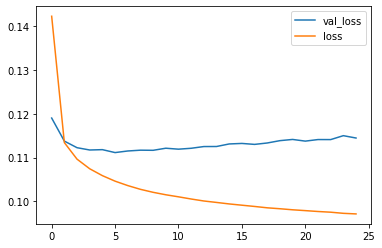

In [127]:
losses[['val_loss', 'loss']].plot()

In [128]:
## Evalute
model.evaluate(body_test, test_tags, batch_size=128)

## Epochs = 3
# 644/644 [==============================] - 1s 1ms/step - loss: 0.1101 - accuracy: 0.8389
# [0.11007880419492722, 0.8388601541519165]

##Epochs = 25
# 644/644 [==============================] - 1s 1ms/step - loss: 0.1136 - accuracy: 0.8345
# [0.1136125847697258, 0.8345237374305725]

##Model shape 50>25>out
# 644/644 [==============================] - 1s 1ms/step - loss: 0.1116 - accuracy: 0.8378
# [0.11160676926374435, 0.8377547860145569]

## Model Shape is changed to 100 > 50 > 25 > out ---- Overfitting
# 644/644 [==============================] - 1s 1ms/step - loss: 0.1246 - accuracy: 0.8327
# [0.12457164376974106, 0.8326895236968994]

## Dropout 0.2
# 644/644 [==============================] - 1s 1ms/step - loss: 0.1135 - accuracy: 0.8352
# [0.11345642060041428, 0.8352282643318176]

644/644 [==============================] - 1s 1ms/step - loss: 0.1120 - accuracy: 0.8354


[0.11201324313879013, 0.8354104161262512]

In [129]:
model.save('keras_stackoverflow_tags.h5')

In [130]:
%%writefile model_prediction1.py
import pickle
import os
import numpy as np

class CustomModelPrediction(object):

    def __init__(self, model, processor):
        self._model = model
        self._processor = processor

    def predict(self, instances, **kwargs):
        preprocessed_data = self._processor.transform_text(instances)
        predictions = self._model.predict(preprocessed_data)
        return predictions.tolist()

    @classmethod
    def from_path(cls, model_dir):
        import tensorflow.keras as keras
        model = keras.models.load_model(
            os.path.join(model_dir,'keras_stackoverflow_tags.h5')
        )
        with open(os.path.join(model_dir, 'processor_state.pkl'), 'rb') as f:
            processor = pickle.load(f)

        return cls(model, processor)

Overwriting model_prediction1.py


In [132]:
# for i in range(len(test_set)):
#     print('Predicted Labels:')
#     for idx, val in enumerate(results[i]):
#         if val > 0.7:
#             print(tag_encoder.classes_[idx])
#     print('\n')

Predicted Labels:
keras




In [133]:
que5 = '''

I have a classification (Keras) with LSTM for a dataset with 4 attributes labeled into 2 classes (safe and unsafe). with put the sigmoid in the last layer I got a better accuracy of 98% rather than softmax. My question is that:
1 )If I use Softmax in the last layer: in Softmax based on the 2 neurons as output at the end in other code, I can compare the score and say the data belong to which. For example score_safe= 1.2945 and score_unsafe= -9.0 then I can say this row of dataset belongs to the safe class. 2)If I use Sigmid in the last layer: Then I had to put just a neuron as up output and how can I compare the scores and how can say this row of datasets belongs to which class?

model = Sequential()
model.add(LSTM(256, input_shape=(x_train.shape[1:]), activation='tanh', return_sequences=True))
#model.add(BatchNormalization())
model.add(Dense(128, activation='tanh'))
#model.add(BatchNormalization())
model.add(Dense(128, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))'''

In [134]:
# test_set = ["keras NN 60% accuracy during training 0.0% accuracy during test I've done this nn with keras that have a 60% accuracy during training. The problem is when i try to test my network with a dataset i get a network that is super sure that all the images are in the"]
# test_set = ["Sigmoid as a last layer in LSTM I have a classification (Keras) with LSTM for a dataset with 4 attributes labeled into 2 classes (safe and unsafe). with put the sigmoid in the last layer I got a better accuracy of 98% rather than "]
test_set = [que5]

from model_prediction1 import CustomModelPrediction

classifier = CustomModelPrediction.from_path('.')
results = classifier.predict(test_set)
print(','.join(tag_encoder.classes_))
for i in results:print(i)

for i in range(len(test_set)):
    print('Predicted Labels:')
    for idx, val in enumerate(results[i]):
        if val > 0.7:
            print(tag_encoder.classes_[idx], val)
    print('\n')

keras,matplotlib,numpy,pandas,scikit-learn,seaborn,tensorflow
[0.9614496827125549, 2.4260700115519285e-07, 0.0038607418537139893, 0.0010637640953063965, 0.004535466432571411, 3.349854393874807e-09, 0.5438019037246704]
Predicted Labels:
keras 0.9614496827125549




In [136]:
#classification report and confusion matrix
from sklearn.metrics import classification_report

predictions = model.predict(body_test) #test_tags

In [142]:
pred_df = pd.DataFrame(predictions)

In [163]:
pred_df = pred_df.apply(lambda i : i > 0.7)

In [164]:
print(classification_report(test_tags, pred_df))

              precision    recall  f1-score   support

           0       0.89      0.58      0.70      7085
           1       0.91      0.76      0.83     11476
           2       0.93      0.66      0.77     17441
           3       0.97      0.92      0.94     38650
           4       0.90      0.68      0.77      4495
           5       0.72      0.24      0.36      1280
           6       0.92      0.76      0.83     14147

   micro avg       0.94      0.78      0.85     94574
   macro avg       0.89      0.66      0.74     94574
weighted avg       0.93      0.78      0.85     94574
 samples avg       0.87      0.82      0.84     94574



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**pkg and deploy**

In [167]:
#package model and custom classe

In [168]:
%%writefile setup.py

from setuptools import setup

setup(
    name="sp_predict",
    version="0.1"
    include_package_date=True,
    scripts=['perprocess.py', 'model_prediction1.py']
)

Writing setup.py


In [169]:
%%capture
!gsutil cp keras_stackoverflow_tags.h5 gs://stackoverflow-que-tags/
